## Importing Relevant Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from catboost import CatBoostRegressor
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor
from mlxtend.regressor import StackingCVRegressor
from sklearn import metrics

## Data Preprocessing

In [2]:
pd.set_option('display.max_columns',90)
data=pd.read_csv(r'C:\Users\ASUS\Downloads\Life Expectancy Data.csv')
data

,Country,Year,Status,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,BMI,under-five deaths,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling,Life expectancy
0,Afghanistan,2015,Developing,263.0,62,0.01,71.279624,65.0,1154,19.1,83,6.0,8.16,65.0,0.1,584.259210,33736494.0,17.2,17.3,0.479,10.1,65.0
1,Afghanistan,2014,Developing,271.0,64,0.01,73.523582,62.0,492,18.6,86,58.0,8.18,62.0,0.1,612.696514,327582.0,17.5,17.5,0.476,10.0,59.9
2,Afghanistan,2013,Developing,268.0,66,0.01,73.219243,64.0,430,18.1,89,62.0,8.13,64.0,0.1,631.744976,31731688.0,17.7,17.7,0.470,9.9,59.9
3,Afghanistan,2012,Developing,272.0,69,0.01,78.184215,67.0,2787,17.6,93,67.0,8.52,67.0,0.1,669.959000,3696958.0,17.9,18.0,0.463,9.8,59.5
4,Afghanistan,2011,Developing,275.0,71,0.01,7.097109,68.0,3013,17.2,97,68.0,7.87,68.0,0.1,63.537231,2978599.0,18.2,18.2,0.454,9.5,59.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2933,Zimbabwe,2004,Developing,723.0,27,4.36,0.000000,68.0,31,27.1,42,67.0,7.13,65.0,33.6,454.366654,12777511.0,9.4,9.4,0.407,9.2,44.3
2934,Zimbabwe,2003,Developing,715.0,26,4.06,0.000000,7.0,998,26.7,41,7.0,6.52,68.0,36.7,453.351155,12633897.0,9.8,9.9,0.418,9.5,44.5
2935,Zimbabwe,2002,Developing,73.0,25,4.43,0.000000,73.0,304,26.3,40,73.0,6.53,71.0,39.8,57.348340,125525.0,1.2,1.3,0.427,10.0,44.8
2936,Zimbabwe,2001,Developing,686.0,25,1.72,0.000000,76.0,529,25.9,39,76.0,6.16,75.0,42.1,548.587312,12366165.0,1.6,1.7,0.427,9.8,45.3


In [3]:
data.describe(include='all')

,Country,Year,Status,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,BMI,under-five deaths,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling,Life expectancy
count,2938,2938.000000,2938,2928.000000,2938.000000,2744.000000,2938.000000,2385.000000,2938.000000,2904.000000,2938.000000,2919.000000,2712.00000,2919.000000,2938.000000,2490.000000,2.286000e+03,2904.000000,2904.000000,2771.000000,2775.000000,2928.000000
unique,193,NaN,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,Afghanistan,NaN,Developing,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,16,NaN,2426,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,2007.518720,NaN,164.796448,30.303948,4.602861,738.251295,80.940461,2419.592240,38.321247,42.035739,82.550188,5.93819,82.324084,1.742103,7483.158469,1.275338e+07,4.839704,4.870317,0.627551,11.992793,69.224932
std,NaN,4.613841,NaN,124.292079,117.926501,4.052413,1987.914858,25.070016,11467.272489,20.044034,160.445548,23.428046,2.49832,23.716912,5.077785,14270.169342,6.101210e+07,4.420195,4.508882,0.210904,3.358920,9.523867
min,NaN,2000.000000,NaN,1.000000,0.000000,0.010000,0.000000,1.000000,0.000000,1.000000,0.000000,3.000000,0.37000,2.000000,0.100000,1.681350,3.400000e+01,0.100000,0.100000,0.000000,0.000000,36.300000
25%,NaN,2004.000000,NaN,74.000000,0.000000,0.877500,4.685343,77.000000,0.000000,19.300000,0.000000,78.000000,4.26000,78.000000,0.100000,463.935626,1.957932e+05,1.600000,1.500000,0.493000,10.100000,63.100000
50%,NaN,2008.000000,NaN,144.000000,3.000000,3.755000,64.912906,92.000000,17.000000,43.500000,4.000000,93.000000,5.75500,93.000000,0.100000,1766.947595,1.386542e+06,3.300000,3.300000,0.677000,12.300000,72.100000
75%,NaN,2012.000000,NaN,228.000000,22.000000,7.702500,441.534144,97.000000,360.250000,56.200000,28.000000,97.000000,7.49250,97.000000,0.800000,5910.806335,7.420359e+06,7.200000,7.200000,0.779000,14.300000,75.700000


In [4]:
data.isnull().sum()

Country                              0
Year                                 0
Status                               0
Adult Mortality                     10
infant deaths                        0
Alcohol                            194
percentage expenditure               0
Hepatitis B                        553
Measles                              0
 BMI                                34
under-five deaths                    0
Polio                               19
Total expenditure                  226
Diphtheria                          19
 HIV/AIDS                            0
GDP                                448
Population                         652
 thinness  1-19 years               34
 thinness 5-9 years                 34
Income composition of resources    167
Schooling                          163
Life expectancy                     10
dtype: int64

In [5]:
data.columns = data.columns.str.strip()

In [6]:
data.dtypes

Country                             object
Year                                 int64
Status                              object
Adult Mortality                    float64
infant deaths                        int64
Alcohol                            float64
percentage expenditure             float64
Hepatitis B                        float64
Measles                              int64
BMI                                float64
under-five deaths                    int64
Polio                              float64
Total expenditure                  float64
Diphtheria                         float64
HIV/AIDS                           float64
GDP                                float64
Population                         float64
thinness  1-19 years               float64
thinness 5-9 years                 float64
Income composition of resources    float64
Schooling                          float64
Life expectancy                    float64
dtype: object

In [7]:
data['Adult Mortality']=data['Adult Mortality'].fillna(value=data['Adult Mortality'].mean())
data['Alcohol']=data['Alcohol'].fillna(value=data['Alcohol'].mean())
data['Hepatitis B']=data['Hepatitis B'].fillna(value=data['Hepatitis B'].mean())
data['BMI']=data['BMI'].fillna(value=data['BMI'].mean())
data['Polio']=data['Polio'].fillna(value=data['Polio'].mean())
data['Total expenditure']=data['Total expenditure'].fillna(value=data['Total expenditure'].mean())
data['Diphtheria']=data['Diphtheria'].fillna(value=data['Diphtheria'].mean())
data['GDP']=data['GDP'].fillna(value=data['GDP'].mean())
data['Population']=data['Population'].fillna(value=data['Population'].mean())
data['thinness  1-19 years']=data['thinness  1-19 years'].fillna(value=data['thinness  1-19 years'].mean())
data['thinness 5-9 years']=data['thinness 5-9 years'].fillna(value=data['thinness 5-9 years'].mean())
data['Income composition of resources']=data['Income composition of resources'].fillna(value=data['Income composition of resources'].mean())
data['Schooling']=data['Schooling'].fillna(value=data['Schooling'].mean())
data['Life expectancy']=data['Life expectancy'].fillna(value=data['Life expectancy'].mean())

In [8]:
data.isnull().sum()

Country                            0
Year                               0
Status                             0
Adult Mortality                    0
infant deaths                      0
Alcohol                            0
percentage expenditure             0
Hepatitis B                        0
Measles                            0
BMI                                0
under-five deaths                  0
Polio                              0
Total expenditure                  0
Diphtheria                         0
HIV/AIDS                           0
GDP                                0
Population                         0
thinness  1-19 years               0
thinness 5-9 years                 0
Income composition of resources    0
Schooling                          0
Life expectancy                    0
dtype: int64

In [9]:
data.corr()['Life expectancy']

C:\Users\ASUS\AppData\Local\Temp\ipykernel_13944\1047667641.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  data.corr()['Life expectancy']


Year                               0.169623
Adult Mortality                   -0.696359
infant deaths                     -0.196535
Alcohol                            0.391598
percentage expenditure             0.381791
Hepatitis B                        0.203771
Measles                           -0.157574
BMI                                0.559255
under-five deaths                 -0.222503
Polio                              0.461574
Total expenditure                  0.207981
Diphtheria                         0.475418
HIV/AIDS                          -0.556457
GDP                                0.430493
Population                        -0.019638
thinness  1-19 years              -0.472162
thinness 5-9 years                -0.466629
Income composition of resources    0.692483
Schooling                          0.715066
Life expectancy                    1.000000
Name: Life expectancy, dtype: float64

In [10]:
avarage_corr=abs(data.corr()['Life expectancy']).mean()

C:\Users\ASUS\AppData\Local\Temp\ipykernel_13944\1168683524.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  avarage_corr=abs(data.corr()['Life expectancy']).mean()


In [11]:
avarage_corr

0.4238455278454515

In [12]:
data.columns

Index(['Country', 'Year', 'Status', 'Adult Mortality', 'infant deaths',
       'Alcohol', 'percentage expenditure', 'Hepatitis B', 'Measles', 'BMI',
       'under-five deaths', 'Polio', 'Total expenditure', 'Diphtheria',
       'HIV/AIDS', 'GDP', 'Population', 'thinness  1-19 years',
       'thinness 5-9 years', 'Income composition of resources', 'Schooling',
       'Life expectancy'],
      dtype='object')

In [13]:
dropped_columns = []

for i in data[['Year', 'Adult Mortality', 'infant deaths',
       'Alcohol', 'percentage expenditure', 'Hepatitis B', 'Measles', 'BMI',
       'under-five deaths', 'Polio', 'Total expenditure', 'Diphtheria',
       'HIV/AIDS', 'GDP', 'Population', 'thinness  1-19 years',
       'thinness 5-9 years', 'Income composition of resources', 'Schooling',
       'Life expectancy']]:
    
    if abs(data.corr()['Life expectancy'][i])<avarage_corr:
        dropped_columns.append(i)
    
data.drop(dropped_columns, axis=1, inplace=True)  

C:\Users\ASUS\AppData\Local\Temp\ipykernel_13944\2304379037.py:10: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  if abs(data.corr()['Life expectancy'][i])<avarage_corr:


In [14]:
data

,Country,Status,Adult Mortality,BMI,Polio,Diphtheria,HIV/AIDS,GDP,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling,Life expectancy
0,Afghanistan,Developing,263.0,19.1,6.0,65.0,0.1,584.259210,17.2,17.3,0.479,10.1,65.0
1,Afghanistan,Developing,271.0,18.6,58.0,62.0,0.1,612.696514,17.5,17.5,0.476,10.0,59.9
2,Afghanistan,Developing,268.0,18.1,62.0,64.0,0.1,631.744976,17.7,17.7,0.470,9.9,59.9
3,Afghanistan,Developing,272.0,17.6,67.0,67.0,0.1,669.959000,17.9,18.0,0.463,9.8,59.5
4,Afghanistan,Developing,275.0,17.2,68.0,68.0,0.1,63.537231,18.2,18.2,0.454,9.5,59.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2933,Zimbabwe,Developing,723.0,27.1,67.0,65.0,33.6,454.366654,9.4,9.4,0.407,9.2,44.3
2934,Zimbabwe,Developing,715.0,26.7,7.0,68.0,36.7,453.351155,9.8,9.9,0.418,9.5,44.5
2935,Zimbabwe,Developing,73.0,26.3,73.0,71.0,39.8,57.348340,1.2,1.3,0.427,10.0,44.8
2936,Zimbabwe,Developing,686.0,25.9,76.0,75.0,42.1,548.587312,1.6,1.7,0.427,9.8,45.3


In [15]:
data.columns

Index(['Country', 'Status', 'Adult Mortality', 'BMI', 'Polio', 'Diphtheria',
       'HIV/AIDS', 'GDP', 'thinness  1-19 years', 'thinness 5-9 years',
       'Income composition of resources', 'Schooling', 'Life expectancy'],
      dtype='object')

In [16]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
variables = data [[
    'Adult Mortality', 
    'BMI', 
#     'Polio', 
#     'Diphtheria',  
    'HIV/AIDS', 
    'GDP', 
    'thinness  1-19 years', 
#     'thinness 5-9 years',
#     'Income composition of resources', 
#     'Schooling'
]]

vif=pd.DataFrame()
vif['VIF'] = [variance_inflation_factor(variables.values, i) for i in range(variables.shape[1])]
vif['Features'] = variables.columns
vif

,VIF,Features
0,3.268823,Adult Mortality
1,2.258936,BMI
2,1.534466,HIV/AIDS
3,1.455820,GDP
4,2.059206,thinness 1-19 years


In [17]:
data.drop(['Polio', 'Diphtheria', 'thinness 5-9 years', 'Income composition of resources', 'Schooling'], axis=1, inplace=True)

In [18]:
data.columns

Index(['Country', 'Status', 'Adult Mortality', 'BMI', 'HIV/AIDS', 'GDP',
       'thinness  1-19 years', 'Life expectancy'],
      dtype='object')

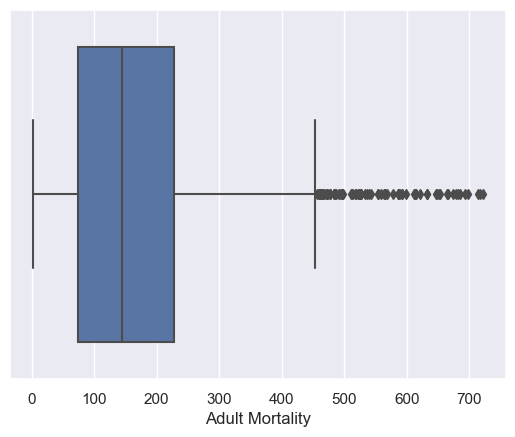

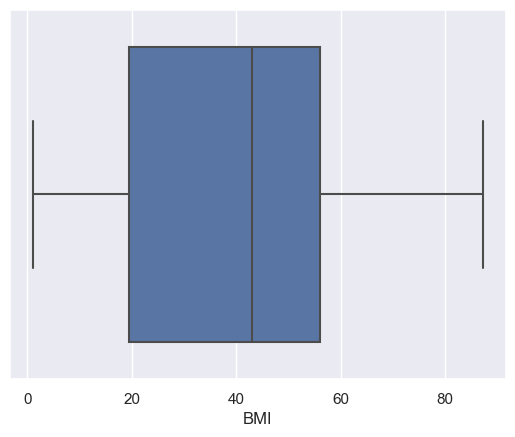

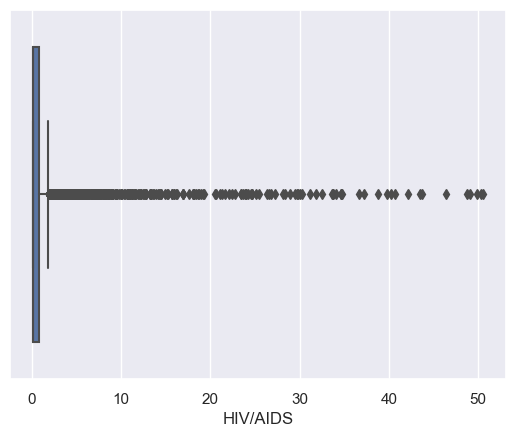

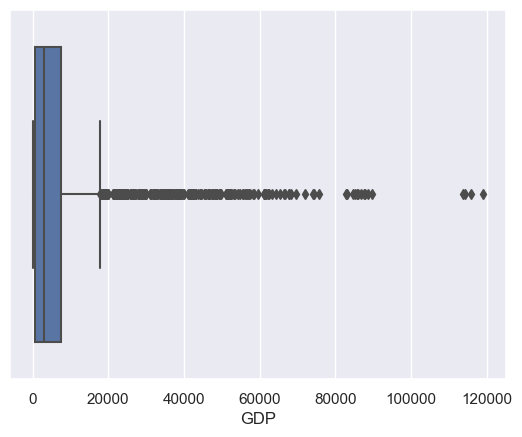

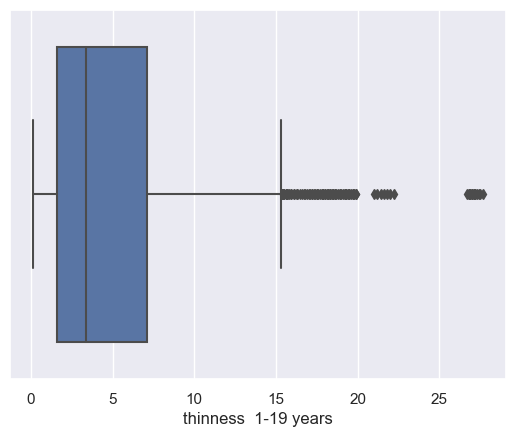

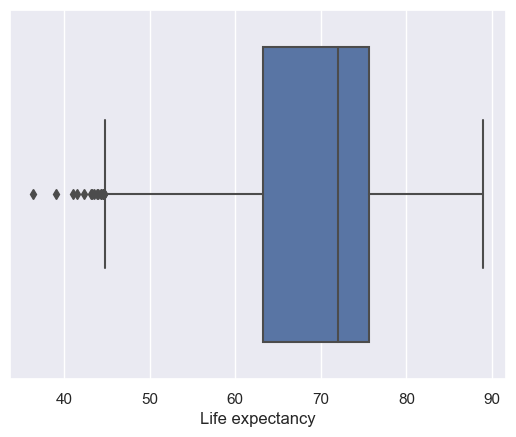

In [19]:
for i in data[['Adult Mortality', 'BMI', 'HIV/AIDS', 'GDP',
       'thinness  1-19 years', 'Life expectancy']]:
    
    sns.boxplot(x=data[i], data=data)
    plt.show()

In [20]:
q1=data.quantile(0.25)
q3=data.quantile(0.75)
IQR=q3-q1
Lower=q1-1.5*IQR
Upper=q3+1.5*IQR

C:\Users\ASUS\AppData\Local\Temp\ipykernel_13944\2761603899.py:1: FutureWarning: The default value of numeric_only in DataFrame.quantile is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  q1=data.quantile(0.25)
C:\Users\ASUS\AppData\Local\Temp\ipykernel_13944\2761603899.py:2: FutureWarning: The default value of numeric_only in DataFrame.quantile is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  q3=data.quantile(0.75)


In [21]:
for i in data[['Adult Mortality', 'BMI', 'HIV/AIDS', 'GDP',
       'thinness  1-19 years', 'Life expectancy']]:
    
    data[i] = np.where(data[i] > Upper[i], Upper[i],data[i])
    data[i] = np.where(data[i] < Lower[i], Lower[i],data[i])

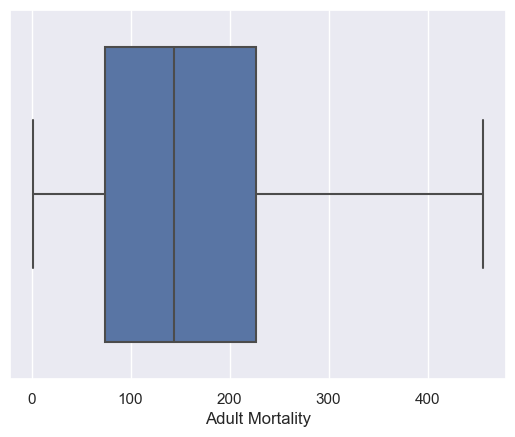

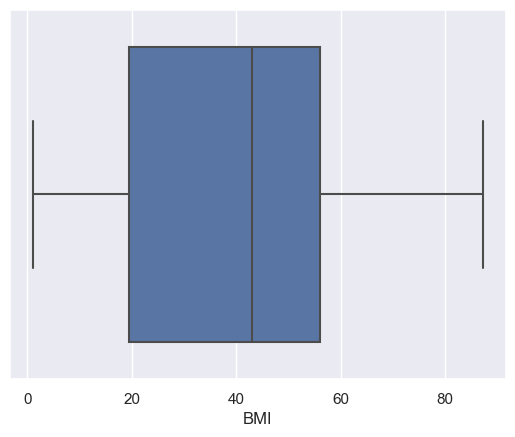

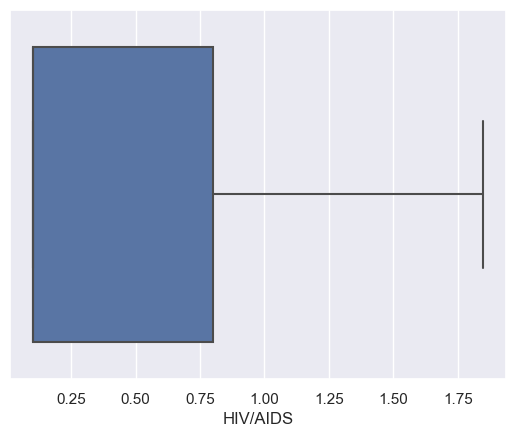

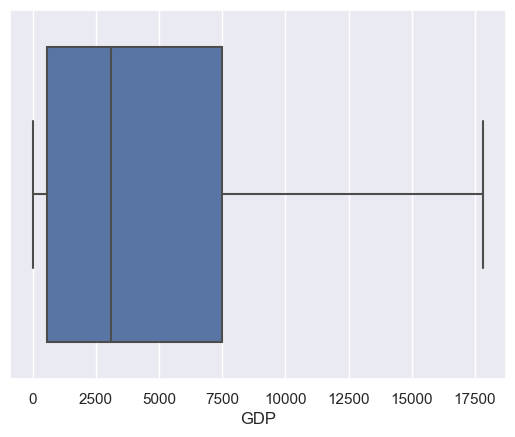

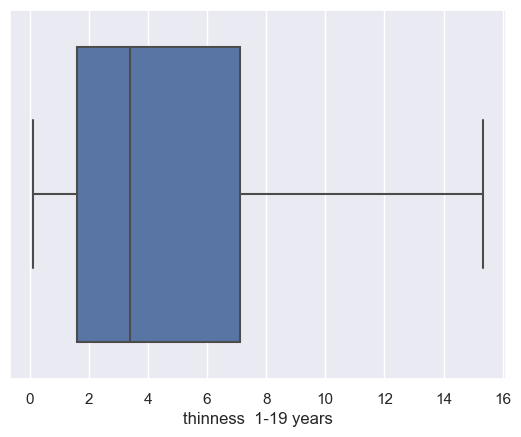

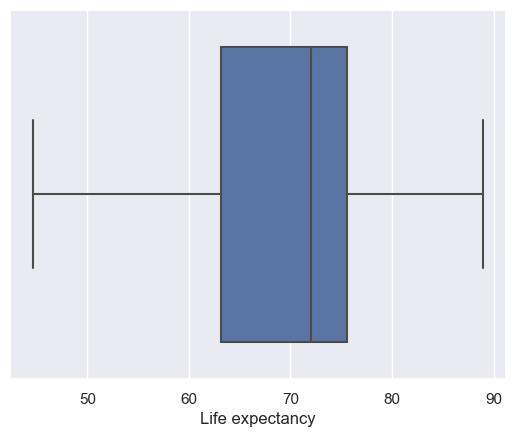

In [22]:
for i in data[['Adult Mortality', 'BMI', 'HIV/AIDS', 'GDP',
       'thinness  1-19 years', 'Life expectancy']]:
    
    sns.boxplot(x=data[i], data=data)
    plt.show()

In [23]:
data=data.reset_index(drop=True)

In [24]:
data.describe(include='all')

,Country,Status,Adult Mortality,BMI,HIV/AIDS,GDP,thinness 1-19 years,Life expectancy
count,2938,2938,2938.000000,2938.000000,2938.000000,2938.000000,2938.000000,2938.000000
unique,193,2,NaN,NaN,NaN,NaN,NaN,NaN
top,Afghanistan,Developing,NaN,NaN,NaN,NaN,NaN,NaN
freq,16,2426,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,NaN,162.024154,38.321247,0.536215,5143.824919,4.705293,69.234802
std,NaN,NaN,115.483835,19.927677,0.693393,5596.911140,3.930224,9.479612
min,NaN,NaN,1.000000,1.000000,0.100000,1.681350,0.100000,44.600000
25%,NaN,NaN,74.000000,19.400000,0.100000,580.486996,1.600000,63.200000
50%,NaN,NaN,144.000000,43.000000,0.100000,3116.561755,3.400000,72.000000
75%,NaN,NaN,227.000000,56.100000,0.800000,7483.158469,7.100000,75.600000


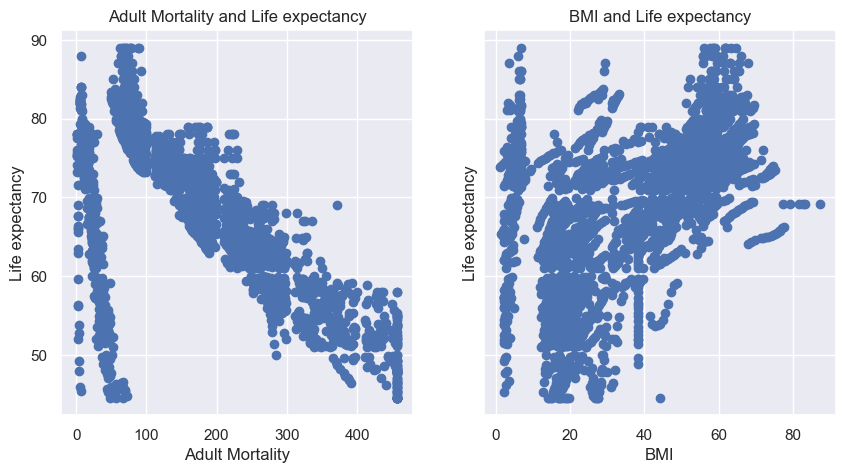

In [25]:
f, (ax1, ax2) = plt.subplots(1, 2, sharey=True, figsize =(10,5))

ax1.scatter(data['Adult Mortality'],data['Life expectancy'])
ax1.set_title('Adult Mortality and Life expectancy')
ax1.set_xlabel('Adult Mortality')
ax1.set_ylabel('Life expectancy')
ax2.scatter(data['BMI'],data['Life expectancy'])
ax2.set_title('BMI and Life expectancy')
ax2.set_xlabel('BMI')
ax2.set_ylabel('Life expectancy')

plt.show()

In [26]:
log_life_expectancy = np.log(data['Life expectancy'])
data['Log_life_expectancy']=log_life_expectancy

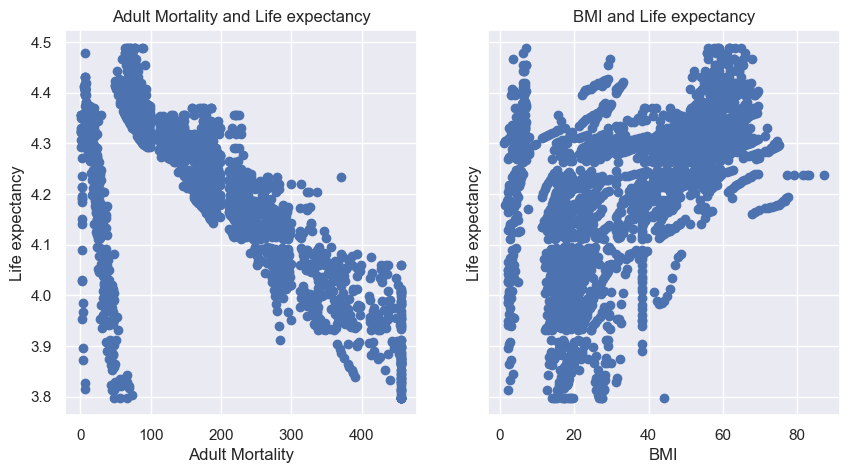

In [27]:
f, (ax1, ax2) = plt.subplots(1, 2, sharey=True, figsize =(10,5))

ax1.scatter(data['Adult Mortality'],data['Log_life_expectancy'])
ax1.set_title('Adult Mortality and Life expectancy')
ax1.set_xlabel('Adult Mortality')
ax1.set_ylabel('Life expectancy')
ax2.scatter(data['BMI'],data['Log_life_expectancy'])
ax2.set_title('BMI and Life expectancy')
ax2.set_xlabel('BMI')
ax2.set_ylabel('Life expectancy')

plt.show()

In [28]:
data

,Country,Status,Adult Mortality,BMI,HIV/AIDS,GDP,thinness 1-19 years,Life expectancy,Log_life_expectancy
0,Afghanistan,Developing,263.0,19.1,0.10,584.259210,15.35,65.0,4.174387
1,Afghanistan,Developing,271.0,18.6,0.10,612.696514,15.35,59.9,4.092677
2,Afghanistan,Developing,268.0,18.1,0.10,631.744976,15.35,59.9,4.092677
3,Afghanistan,Developing,272.0,17.6,0.10,669.959000,15.35,59.5,4.085976
4,Afghanistan,Developing,275.0,17.2,0.10,63.537231,15.35,59.2,4.080922
...,...,...,...,...,...,...,...,...,...
2933,Zimbabwe,Developing,456.5,27.1,1.85,454.366654,9.40,44.6,3.797734
2934,Zimbabwe,Developing,456.5,26.7,1.85,453.351155,9.80,44.6,3.797734
2935,Zimbabwe,Developing,73.0,26.3,1.85,57.348340,1.20,44.8,3.802208
2936,Zimbabwe,Developing,456.5,25.9,1.85,548.587312,1.60,45.3,3.813307


In [29]:
data_with_dummies=data.drop('Country', axis=1)

In [30]:
data_with_dummies=pd.get_dummies(data_with_dummies, drop_first=True)

In [31]:
data_with_dummies

,Adult Mortality,BMI,HIV/AIDS,GDP,thinness 1-19 years,Life expectancy,Log_life_expectancy,Status_Developing
0,263.0,19.1,0.10,584.259210,15.35,65.0,4.174387,1
1,271.0,18.6,0.10,612.696514,15.35,59.9,4.092677,1
2,268.0,18.1,0.10,631.744976,15.35,59.9,4.092677,1
3,272.0,17.6,0.10,669.959000,15.35,59.5,4.085976,1
4,275.0,17.2,0.10,63.537231,15.35,59.2,4.080922,1
...,...,...,...,...,...,...,...,...
2933,456.5,27.1,1.85,454.366654,9.40,44.6,3.797734,1
2934,456.5,26.7,1.85,453.351155,9.80,44.6,3.797734,1
2935,73.0,26.3,1.85,57.348340,1.20,44.8,3.802208,1
2936,456.5,25.9,1.85,548.587312,1.60,45.3,3.813307,1


In [32]:
data_with_dummies.columns

Index(['Adult Mortality', 'BMI', 'HIV/AIDS', 'GDP', 'thinness  1-19 years',
       'Life expectancy', 'Log_life_expectancy', 'Status_Developing'],
      dtype='object')

In [33]:
data_with_dummies=data_with_dummies[['Status_Developing', 'Adult Mortality', 'BMI', 'HIV/AIDS', 'GDP', 'thinness  1-19 years', 'Log_life_expectancy']]

In [34]:
data_with_dummies

,Status_Developing,Adult Mortality,BMI,HIV/AIDS,GDP,thinness 1-19 years,Log_life_expectancy
0,1,263.0,19.1,0.10,584.259210,15.35,4.174387
1,1,271.0,18.6,0.10,612.696514,15.35,4.092677
2,1,268.0,18.1,0.10,631.744976,15.35,4.092677
3,1,272.0,17.6,0.10,669.959000,15.35,4.085976
4,1,275.0,17.2,0.10,63.537231,15.35,4.080922
...,...,...,...,...,...,...,...
2933,1,456.5,27.1,1.85,454.366654,9.40,3.797734
2934,1,456.5,26.7,1.85,453.351155,9.80,3.797734
2935,1,73.0,26.3,1.85,57.348340,1.20,3.802208
2936,1,456.5,25.9,1.85,548.587312,1.60,3.813307


In [35]:
sc=StandardScaler()

In [36]:
scaled_data=sc.fit_transform(data_with_dummies)

In [37]:
scaled_data

array([[ 0.45939851,  0.87452096, -0.9647145 , ..., -0.81479619,
         2.70888393, -0.36249035],
       [ 0.45939851,  0.94380652, -0.98980951, ..., -0.80971443,
         2.70888393, -0.92212077],
       [ 0.45939851,  0.91782444, -1.01490451, ..., -0.80631046,
         2.70888393, -0.92212077],
       ...,
       [ 0.45939851, -0.77101101, -0.60334645, ..., -0.90895537,
        -0.89203308, -2.91151511],
       [ 0.45939851,  2.55036537, -0.62342245, ..., -0.82117077,
        -0.79024037, -2.83549969],
       [ 0.45939851,  2.55036537, -0.64349846, ..., -0.82139029,
         1.60188824, -2.73047587]])

In [38]:
scaled_data=pd.DataFrame(scaled_data, columns=data_with_dummies.columns)
scaled_data

,Status_Developing,Adult Mortality,BMI,HIV/AIDS,GDP,thinness 1-19 years,Log_life_expectancy
0,0.459399,0.874521,-0.964715,-0.629209,-0.814796,2.708884,-0.362490
1,0.459399,0.943807,-0.989810,-0.629209,-0.809714,2.708884,-0.922121
2,0.459399,0.917824,-1.014905,-0.629209,-0.806310,2.708884,-0.922121
3,0.459399,0.952467,-1.040000,-0.629209,-0.799482,2.708884,-0.968010
4,0.459399,0.978449,-1.060076,-0.629209,-0.907849,2.708884,-1.002630
...,...,...,...,...,...,...,...
2933,0.459399,2.550365,-0.563194,1.895041,-0.838008,1.194717,-2.942159
2934,0.459399,2.550365,-0.583270,1.895041,-0.838190,1.296510,-2.942159
2935,0.459399,-0.771011,-0.603346,1.895041,-0.908955,-0.892033,-2.911515
2936,0.459399,2.550365,-0.623422,1.895041,-0.821171,-0.790240,-2.835500


## Modeling

In [39]:
X=scaled_data.drop('Log_life_expectancy', axis=1)
y=scaled_data['Log_life_expectancy']

In [40]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [41]:
def evaluate(model, X_test, y_test):
    
    y_pred_test=model.predict(X_test)
    mae_test=metrics.mean_absolute_error(y_test, y_pred_test)
    mse_test=metrics.mean_squared_error(y_test, y_pred_test)
    rmse_test=np.sqrt(mse_test)
    r2_test=metrics.r2_score(y_test, y_pred_test)
    
    
    y_pred_train=model.predict(X_train)
    mae_train=metrics.mean_absolute_error(y_train, y_pred_train)
    mse_train=metrics.mean_squared_error(y_train, y_pred_train)
    rmse_train=np.sqrt(mse_train)
    r2_train=metrics.r2_score(y_train, y_pred_train)
    
    
    results_dict = {
        'Metric': ['MAE', 'MSE', 'RMSE', 'R2'],
        'Train': [mae_train, mse_train, rmse_train, r2_train*100],
        'Test': [mae_test, mse_test, rmse_test, r2_test*100]
    }

    results_df = pd.DataFrame(results_dict)
    
    print(results_df)

In [42]:
lr=LinearRegression()
lr.fit(X_train, y_train)

LinearRegression()

In [43]:
result_lr=evaluate(lr, X_test, y_test)

  Metric      Train       Test
0    MAE   0.345495   0.330693
1    MSE   0.221067   0.201960
2   RMSE   0.470177   0.449400
3     R2  78.145783  78.816989


## Modeling for other ML algorithms

In [44]:
data

,Country,Status,Adult Mortality,BMI,HIV/AIDS,GDP,thinness 1-19 years,Life expectancy,Log_life_expectancy
0,Afghanistan,Developing,263.0,19.1,0.10,584.259210,15.35,65.0,4.174387
1,Afghanistan,Developing,271.0,18.6,0.10,612.696514,15.35,59.9,4.092677
2,Afghanistan,Developing,268.0,18.1,0.10,631.744976,15.35,59.9,4.092677
3,Afghanistan,Developing,272.0,17.6,0.10,669.959000,15.35,59.5,4.085976
4,Afghanistan,Developing,275.0,17.2,0.10,63.537231,15.35,59.2,4.080922
...,...,...,...,...,...,...,...,...,...
2933,Zimbabwe,Developing,456.5,27.1,1.85,454.366654,9.40,44.6,3.797734
2934,Zimbabwe,Developing,456.5,26.7,1.85,453.351155,9.80,44.6,3.797734
2935,Zimbabwe,Developing,73.0,26.3,1.85,57.348340,1.20,44.8,3.802208
2936,Zimbabwe,Developing,456.5,25.9,1.85,548.587312,1.60,45.3,3.813307


In [45]:
data.drop('Log_life_expectancy', axis=1, inplace=True)

In [46]:
data_dummied=data.drop('Country', axis=1)

In [47]:
data_dummied=pd.get_dummies(data_dummied, drop_first=True)

In [48]:
data_dummied

,Adult Mortality,BMI,HIV/AIDS,GDP,thinness 1-19 years,Life expectancy,Status_Developing
0,263.0,19.1,0.10,584.259210,15.35,65.0,1
1,271.0,18.6,0.10,612.696514,15.35,59.9,1
2,268.0,18.1,0.10,631.744976,15.35,59.9,1
3,272.0,17.6,0.10,669.959000,15.35,59.5,1
4,275.0,17.2,0.10,63.537231,15.35,59.2,1
...,...,...,...,...,...,...,...
2933,456.5,27.1,1.85,454.366654,9.40,44.6,1
2934,456.5,26.7,1.85,453.351155,9.80,44.6,1
2935,73.0,26.3,1.85,57.348340,1.20,44.8,1
2936,456.5,25.9,1.85,548.587312,1.60,45.3,1


In [49]:
data_dummied.columns

Index(['Adult Mortality', 'BMI', 'HIV/AIDS', 'GDP', 'thinness  1-19 years',
       'Life expectancy', 'Status_Developing'],
      dtype='object')

In [50]:
data_dummied=data_dummied[['Status_Developing', 'Adult Mortality', 'BMI', 'HIV/AIDS', 'GDP', 'thinness  1-19 years',
       'Life expectancy']]

In [51]:
data_dummied

,Status_Developing,Adult Mortality,BMI,HIV/AIDS,GDP,thinness 1-19 years,Life expectancy
0,1,263.0,19.1,0.10,584.259210,15.35,65.0
1,1,271.0,18.6,0.10,612.696514,15.35,59.9
2,1,268.0,18.1,0.10,631.744976,15.35,59.9
3,1,272.0,17.6,0.10,669.959000,15.35,59.5
4,1,275.0,17.2,0.10,63.537231,15.35,59.2
...,...,...,...,...,...,...,...
2933,1,456.5,27.1,1.85,454.366654,9.40,44.6
2934,1,456.5,26.7,1.85,453.351155,9.80,44.6
2935,1,73.0,26.3,1.85,57.348340,1.20,44.8
2936,1,456.5,25.9,1.85,548.587312,1.60,45.3


In [52]:
X=data_dummied.drop('Life expectancy', axis=1)
y=data_dummied['Life expectancy']

In [53]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [54]:
def evaluate(model, X_test, y_test):
    y_pred=model.predict(X_test)
    mae_test=metrics.mean_absolute_error(y_test, y_pred)
    mse_test=metrics.mean_squared_error(y_test, y_pred)
    rmse_test=np.sqrt(mse_test)
    r2_test=metrics.r2_score(y_test, y_pred)
    
    y_pred_train=model.predict(X_train)
    mae_train=metrics.mean_absolute_error(y_train, y_pred_train)
    mse_train=metrics.mean_squared_error(y_train, y_pred_train)
    rmse_train=np.sqrt(mse_train)
    r2_train=metrics.r2_score(y_train, y_pred_train)
    
    
    results_dict = {
        'Metric': ['MAE', 'MSE', 'RMSE', 'R2'],
        'Train': [mae_train, mse_train, rmse_train, r2_train*100],
        'Test': [mae_test, mse_test, rmse_test, r2_test*100]
    }

    results_df = pd.DataFrame(results_dict)
    
    print(results_df)

In [55]:
dtr=DecisionTreeRegressor()
dtr.fit(X_train, y_train)

DecisionTreeRegressor()

In [56]:
result_dtr=evaluate(dtr, X_test, y_test)

  Metric      Train       Test
0    MAE   0.003872   1.715009
1    MSE   0.012004   7.924427
2   RMSE   0.109564   2.815036
3     R2  99.986758  90.839763


In [57]:
base_rfr=RandomForestRegressor(n_estimators=100, random_state=42)
base_rfr.fit(X_train, y_train)

RandomForestRegressor(random_state=42)

In [58]:
result_base_rfr=evaluate(base_rfr, X_test, y_test)

  Metric      Train       Test
0    MAE   0.530290   1.285443
1    MSE   0.685397   3.784504
2   RMSE   0.827887   1.945380
3     R2  99.243904  95.625304


In [59]:
from sklearn.model_selection import RandomizedSearchCV

n_estimators = [int(x) for x in np.linspace(start = 200, stop = 2000, num = 10)]

max_features = ['auto', 'sqrt']

max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]

min_samples_split = [2, 5, 10]

min_samples_leaf = [1, 2, 4]

random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf}

print(random_grid)

{'n_estimators': [200, 400, 600, 800, 1000, 1200, 1400, 1600, 1800, 2000], 'max_features': ['auto', 'sqrt'], 'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110], 'min_samples_split': [2, 5, 10], 'min_samples_leaf': [1, 2, 4]}


In [60]:
rfr_randomized = RandomizedSearchCV(estimator = base_rfr, 
                                    param_distributions = random_grid, 
                                    n_iter = 10, cv = 3, 
                                    verbose=1, random_state=42, 
                                    n_jobs = -1)

rfr_randomized.fit(X_train, y_train)

Fitting 3 folds for each of 10 candidates, totalling 30 fits


C:\Users\ASUS\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py:425: FitFailedWarning: 
18 fits failed out of a total of 30.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
10 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\ASUS\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py", line 732, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\ASUS\anaconda3\Lib\site-packages\sklearn\base.py", line 1144, in wrapper
    estimator._validate_params()
  File "C:\Users\ASUS\anaconda3\Lib\site-packages\sklearn\base.py", line 637, in _validate_params
    validate_parameter_constraints(
  File "C:\Users\ASUS\anaconda3\Lib\site-packages\sklea

RandomizedSearchCV(cv=3, estimator=RandomForestRegressor(random_state=42),
                   n_jobs=-1,
                   param_distributions={'max_depth': [10, 20, 30, 40, 50, 60,
                                                      70, 80, 90, 100, 110],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 4],
                                        'min_samples_split': [2, 5, 10],
                                        'n_estimators': [200, 400, 600, 800,
                                                         1000, 1200, 1400, 1600,
                                                         1800, 2000]},
                   random_state=42, verbose=1)

In [61]:
rfr_randomized.best_params_

{'n_estimators': 1000,
 'min_samples_split': 5,
 'min_samples_leaf': 1,
 'max_features': 'sqrt',
 'max_depth': 100}

In [62]:
optimized_rfr_model=rfr_randomized.best_estimator_
result_optimized_rfr_model=evaluate(optimized_rfr_model, X_test, y_test)

  Metric      Train       Test
0    MAE   0.778554   1.339308
1    MSE   1.368089   3.771405
2   RMSE   1.169653   1.942011
3     R2  98.490793  95.640447


In [63]:
xgboost_reg_base=XGBRegressor()
xgboost_reg_base.fit(X_train, y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=None, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

In [64]:
result_xgboost_reg_base=evaluate(xgboost_reg_base, X_test, y_test)

  Metric      Train       Test
0    MAE   0.392619   1.365617
1    MSE   0.342736   3.853765
2   RMSE   0.585437   1.963101
3     R2  99.621910  95.545243


In [65]:
lightgbm_reg_base=LGBMRegressor()
lightgbm_reg_base.fit(X_train, y_train)

[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000113 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 918
[LightGBM] [Info] Number of data points in the train set: 2350, number of used features: 6
[LightGBM] [Info] Start training from score 69.288681


LGBMRegressor()

In [66]:
result_lightgbm_reg_base=evaluate(lightgbm_reg_base, X_test, y_test)

  Metric      Train       Test
0    MAE   1.033722   1.404726
1    MSE   2.185725   4.051149
2   RMSE   1.478420   2.012747
3     R2  97.588818  95.317076


In [67]:
catboost_dummy_base=CatBoostRegressor()
catboost_dummy_base.fit(X_train, y_train)

Learning rate set to 0.046861
0:	learn: 9.1745624	total: 119ms	remaining: 1m 59s
1:	learn: 8.8410720	total: 123ms	remaining: 1m 1s
2:	learn: 8.5449530	total: 126ms	remaining: 42s
3:	learn: 8.2565734	total: 130ms	remaining: 32.4s
4:	learn: 7.9742173	total: 134ms	remaining: 26.6s
5:	learn: 7.7149631	total: 137ms	remaining: 22.8s
6:	learn: 7.4578921	total: 141ms	remaining: 20s
7:	learn: 7.2145728	total: 144ms	remaining: 17.9s
8:	learn: 6.9840254	total: 148ms	remaining: 16.3s
9:	learn: 6.7749092	total: 151ms	remaining: 15s
10:	learn: 6.5586684	total: 154ms	remaining: 13.9s
11:	learn: 6.3629405	total: 158ms	remaining: 13s
12:	learn: 6.1899399	total: 162ms	remaining: 12.3s
13:	learn: 6.0106091	total: 166ms	remaining: 11.7s
14:	learn: 5.8356774	total: 169ms	remaining: 11.1s
15:	learn: 5.6790815	total: 173ms	remaining: 10.6s
16:	learn: 5.5217335	total: 176ms	remaining: 10.2s
17:	learn: 5.3822092	total: 180ms	remaining: 9.8s
18:	learn: 5.2611408	total: 183ms	remaining: 9.43s
19:	learn: 5.126581

In [68]:
result_catboost_dummy_base=evaluate(catboost_dummy_base, X_test, y_test)

  Metric      Train       Test
0    MAE   0.942966   1.312817
1    MSE   1.748539   3.655089
2   RMSE   1.322323   1.911829
3     R2  98.071100  95.774902


In [69]:
#Hyperparameter Tuning (Lightgbm)
param_distributions = {
    'n_estimators': [10, 50, 100, 500, 1000],
    'learning_rate': [0.01, 0.1, 1.0],
    'max_depth': [3, 5, 7, 10],
    'num_leaves': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100]    
}

param_distributions

{'n_estimators': [10, 50, 100, 500, 1000],
 'learning_rate': [0.01, 0.1, 1.0],
 'max_depth': [3, 5, 7, 10],
 'num_leaves': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100]}

In [70]:
lightgbm_randomized=RandomizedSearchCV(lightgbm_reg_base, param_distributions=param_distributions, 
                                       n_iter=10, cv=5, 
                                       n_jobs=-1, random_state=42)

lightgbm_randomized.fit(X_train, y_train)

[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000117 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 918
[LightGBM] [Info] Number of data points in the train set: 2350, number of used features: 6
[LightGBM] [Info] Start training from score 69.288681
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive ga

RandomizedSearchCV(cv=5, estimator=LGBMRegressor(), n_jobs=-1,
                   param_distributions={'learning_rate': [0.01, 0.1, 1.0],
                                        'max_depth': [3, 5, 7, 10],
                                        'n_estimators': [10, 50, 100, 500,
                                                         1000],
                                        'num_leaves': [10, 20, 30, 40, 50, 60,
                                                       70, 80, 90, 100]},
                   random_state=42)

In [71]:
print('Best hyperparameters for the lightgbm:', lightgbm_randomized.best_params_)

Best hyperparameters for the lightgbm: {'num_leaves': 100, 'n_estimators': 1000, 'max_depth': 7, 'learning_rate': 0.1}


In [72]:
optimized_lightgbm=lightgbm_randomized.best_estimator_

In [73]:
result_lightgbm_optimized = evaluate(optimized_lightgbm, X_test, y_test)

  Metric      Train       Test
0    MAE   0.399828   1.406319
1    MSE   0.329918   4.314237
2   RMSE   0.574385   2.077074
3     R2  99.636051  95.012961


In [74]:
#Hyperparameter Tuning (XGBoost)
param_distributions = {
    
    'n_estimators': [10, 50, 100, 500, 1000],
    'learning_rate': [0.01, 0.1, 1.0],
    'max_depth': [3, 5, 7, 10],
    'subsample': np.linspace(0.5, 1, num=6),
    'colsample_bytree': np.linspace(0.5, 1, num=6),
    'gamma': [0,1,5,10]
    
}

param_distributions

{'n_estimators': [10, 50, 100, 500, 1000],
 'learning_rate': [0.01, 0.1, 1.0],
 'max_depth': [3, 5, 7, 10],
 'subsample': array([0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 'colsample_bytree': array([0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 'gamma': [0, 1, 5, 10]}

In [75]:
xgboost_randomized = RandomizedSearchCV(xgboost_reg_base, param_distributions=param_distributions,
                                        n_iter=10, cv=5,
                                        n_jobs=-1, random_state=42)

xgboost_randomized.fit(X_train, y_train)

RandomizedSearchCV(cv=5,
                   estimator=XGBRegressor(base_score=None, booster=None,
                                          callbacks=None,
                                          colsample_bylevel=None,
                                          colsample_bynode=None,
                                          colsample_bytree=None, device=None,
                                          early_stopping_rounds=None,
                                          enable_categorical=False,
                                          eval_metric=None, feature_types=None,
                                          gamma=None, grow_policy=None,
                                          importance_type=None,
                                          interaction_constraints=None,
                                          learning_rate=...
                                          monotone_constraints=None,
                                          multi_strategy=None,
                                          n_estimators=None, n_jobs=None,
                                          num_parallel_tree=None,
                                          random_state=None, ...),
                   n_jobs=-1,
                   param_distributions={'colsample_bytree': array([0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
                                        'gamma': [0, 1, 5, 10],
                                        'learning_rate': [0.01, 0.1, 1.0],
                                        'max_depth': [3, 5, 7, 10],
                                        'n_estimators': [10, 50, 100, 500,
                                                         1000],
                                        'subsample': array([0.5, 0.6, 0.7, 0.8, 0.9, 1. ])},
                   random_state=42)

In [76]:
print('Best hyperparameters for XGBoost:', xgboost_randomized.best_params_)

Best hyperparameters for XGBoost: {'subsample': 0.9, 'n_estimators': 1000, 'max_depth': 5, 'learning_rate': 0.1, 'gamma': 10, 'colsample_bytree': 0.8}


In [77]:
optimized_xgboost=xgboost_randomized.best_estimator_

In [78]:
result_xgboost_optimized= evaluate(optimized_xgboost, X_test, y_test)

  Metric      Train       Test
0    MAE   1.263074   1.485165
1    MSE   3.020722   4.330187
2   RMSE   1.738022   2.080910
3     R2  96.667692  94.994523


In [79]:
#Hyperparameter Tuning (CatBoost)

param_distributions = {
    
    'iterations': [10, 50, 100, 500, 1000],
    'learning_rate': [0.01, 0.1, 1.0],
    'depth': [3, 5, 7, 9],
    'l2_leaf_reg': np.linspace(2, 30, num=7)
    
}

param_distributions

{'iterations': [10, 50, 100, 500, 1000],
 'learning_rate': [0.01, 0.1, 1.0],
 'depth': [3, 5, 7, 9],
 'l2_leaf_reg': array([ 2.        ,  6.66666667, 11.33333333, 16.        , 20.66666667,
        25.33333333, 30.        ])}

In [80]:
catboost_randomized=RandomizedSearchCV(catboost_dummy_base,
                                       param_distributions=param_distributions,
                                       cv=5, n_iter=10, 
                                       random_state=42)

catboost_randomized.fit(X_train, y_train)

0:	learn: 8.8557298	total: 1.56ms	remaining: 76.6ms
1:	learn: 8.3135464	total: 3.99ms	remaining: 95.7ms
2:	learn: 7.8986791	total: 6.26ms	remaining: 98.1ms
3:	learn: 7.4682164	total: 8.41ms	remaining: 96.7ms
4:	learn: 7.0771100	total: 10.1ms	remaining: 90.5ms
5:	learn: 6.6993965	total: 12.7ms	remaining: 93.1ms
6:	learn: 6.3306000	total: 15.4ms	remaining: 94.4ms
7:	learn: 5.9926658	total: 17.6ms	remaining: 92.6ms
8:	learn: 5.7411008	total: 19.5ms	remaining: 88.9ms
9:	learn: 5.5152883	total: 21.1ms	remaining: 84.5ms
10:	learn: 5.2910813	total: 22.2ms	remaining: 78.8ms
11:	learn: 5.0738927	total: 23.2ms	remaining: 73.3ms
12:	learn: 4.8964021	total: 24.1ms	remaining: 68.6ms
13:	learn: 4.7262054	total: 25ms	remaining: 64.3ms
14:	learn: 4.5692961	total: 26.6ms	remaining: 62ms
15:	learn: 4.4132738	total: 28.4ms	remaining: 60.4ms
16:	learn: 4.3008646	total: 30ms	remaining: 58.2ms
17:	learn: 4.1569090	total: 31.7ms	remaining: 56.3ms
18:	learn: 4.0555380	total: 33.3ms	remaining: 54.3ms
19:	learn

RandomizedSearchCV(cv=5,
                   estimator=<catboost.core.CatBoostRegressor object at 0x00000233D37E0E10>,
                   param_distributions={'depth': [3, 5, 7, 9],
                                        'iterations': [10, 50, 100, 500, 1000],
                                        'l2_leaf_reg': array([ 2.        ,  6.66666667, 11.33333333, 16.        , 20.66666667,
       25.33333333, 30.        ]),
                                        'learning_rate': [0.01, 0.1, 1.0]},
                   random_state=42)

In [81]:
print('Best parameters for CatBoost model:', catboost_randomized.best_params_)

Best parameters for CatBoost model: {'learning_rate': 0.1, 'l2_leaf_reg': 11.333333333333334, 'iterations': 500, 'depth': 5}


In [82]:
optimized_catboost=catboost_randomized.best_estimator_

In [83]:
result_catboost_optimized = evaluate(optimized_catboost, X_test, y_test)

  Metric      Train       Test
0    MAE   1.200158   1.415352
1    MSE   2.761893   4.074217
2   RMSE   1.661894   2.018469
3     R2  96.953219  95.290411


In [84]:
#Stacking Model

base_regressors = [
    optimized_rfr_model,
    xgboost_reg_base,
    lightgbm_reg_base,
    optimized_catboost,
]

In [85]:
meta_regressor=catboost_dummy_base

In [86]:
stacking_regressor = StackingCVRegressor(regressors=base_regressors,
                                           meta_regressor=meta_regressor,
                                           cv=5,
                                           use_features_in_secondary=True,
                                           verbose=1,
                                           random_state=42)

In [87]:
stacking_regressor.fit(X_train, y_train)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:   29.6s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    0.3s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000087 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 912
[LightGBM] [Info] Number of data points in the train set: 1880, number of used features: 6
[LightGBM] [Info] Start training from score 69.437673
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000086 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 913
[LightGBM] [Info] Number of data points in the train set: 1880, number of used features: 6
[LightGBM] [Info] Start training from score 69.318258
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000087 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 913
[LightGBM] [Info] Number of data points in the train set: 1880, number of used features: 6
[LightGBM] [Info] Start training f

[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    0.2s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


0:	learn: 8.8207587	total: 2ms	remaining: 996ms
1:	learn: 8.2172148	total: 3.95ms	remaining: 983ms
2:	learn: 7.7553836	total: 5ms	remaining: 829ms
3:	learn: 7.2920305	total: 5.87ms	remaining: 728ms
4:	learn: 6.8618503	total: 6.79ms	remaining: 672ms
5:	learn: 6.4721264	total: 7.73ms	remaining: 636ms
6:	learn: 6.0995992	total: 8.63ms	remaining: 608ms
7:	learn: 5.7500621	total: 9.65ms	remaining: 594ms
8:	learn: 5.4814499	total: 10.6ms	remaining: 576ms
9:	learn: 5.2621620	total: 11.5ms	remaining: 561ms
10:	learn: 5.0438841	total: 12.3ms	remaining: 548ms
11:	learn: 4.8489040	total: 13.5ms	remaining: 549ms
12:	learn: 4.6621493	total: 15ms	remaining: 562ms
13:	learn: 4.4954811	total: 16.4ms	remaining: 571ms
14:	learn: 4.3424194	total: 17.8ms	remaining: 576ms
15:	learn: 4.1943954	total: 18.9ms	remaining: 573ms
16:	learn: 4.0855787	total: 20ms	remaining: 570ms
17:	learn: 3.9732323	total: 21ms	remaining: 562ms
18:	learn: 3.8750467	total: 21.9ms	remaining: 555ms
19:	learn: 3.7967792	total: 22.9ms

[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    2.6s finished


Learning rate set to 0.046861
0:	learn: 9.1438744	total: 3ms	remaining: 3s
1:	learn: 8.7724431	total: 4.69ms	remaining: 2.34s
2:	learn: 8.4195554	total: 6.16ms	remaining: 2.05s
3:	learn: 8.0791495	total: 7.59ms	remaining: 1.89s
4:	learn: 7.7620344	total: 9.69ms	remaining: 1.93s
5:	learn: 7.4670557	total: 11.6ms	remaining: 1.93s
6:	learn: 7.1780806	total: 14.7ms	remaining: 2.09s
7:	learn: 6.8953982	total: 16.7ms	remaining: 2.07s
8:	learn: 6.6282073	total: 18.2ms	remaining: 2.01s
9:	learn: 6.3750055	total: 19.7ms	remaining: 1.95s
10:	learn: 6.1453621	total: 21.1ms	remaining: 1.9s
11:	learn: 5.9186207	total: 22.6ms	remaining: 1.86s
12:	learn: 5.6992240	total: 24.7ms	remaining: 1.88s
13:	learn: 5.5081650	total: 27.6ms	remaining: 1.95s
14:	learn: 5.3164474	total: 30.4ms	remaining: 2s
15:	learn: 5.1282196	total: 32.7ms	remaining: 2.01s
16:	learn: 4.9553668	total: 35.9ms	remaining: 2.08s
17:	learn: 4.7892519	total: 38.1ms	remaining: 2.08s
18:	learn: 4.6344478	total: 40.4ms	remaining: 2.09s
19

StackingCVRegressor(meta_regressor=<catboost.core.CatBoostRegressor object at 0x00000233D37E0E10>,
                    random_state=42,
                    regressors=[RandomForestRegressor(max_depth=100,
                                                      max_features='sqrt',
                                                      min_samples_split=5,
                                                      n_estimators=1000,
                                                      random_state=42),
                                XGBRegressor(base_score=None, booster=None,
                                             callbacks=None,
                                             colsample_bylevel=None,
                                             colsample_bynode=None,
                                             colsample_bytr...
                                             max_cat_threshold=None,
                                             max_cat_to_onehot=None,
                                             max_delta_step=None,
                                             max_depth=None, max_leaves=None,
                                             min_child_weight=None, missing=nan,
                                             monotone_constraints=None,
                                             multi_strategy=None,
                                             n_estimators=None, n_jobs=None,
                                             num_parallel_tree=None,
                                             random_state=None, ...),
                                LGBMRegressor(),
                                <catboost.core.CatBoostRegressor object at 0x00000233D3515110>],
                    use_features_in_secondary=True, verbose=1)

In [88]:
result_stacking_regressor=evaluate(stacking_regressor, X_test, y_test)

C:\Users\ASUS\anaconda3\Lib\site-packages\sklearn\base.py:457: UserWarning: X has feature names, but RandomForestRegressor was fitted without feature names
  warnings.warn(
C:\Users\ASUS\anaconda3\Lib\site-packages\sklearn\base.py:457: UserWarning: X has feature names, but RandomForestRegressor was fitted without feature names
  warnings.warn(


  Metric      Train       Test
0    MAE   0.743920   1.312608
1    MSE   1.213748   3.688430
2   RMSE   1.101702   1.920529
3     R2  98.661054  95.736362


In [89]:
svr_base_model=SVR()
svr_base_model.fit(X_train, y_train)

SVR()

In [90]:
result_svr_base_model=evaluate(svr_base_model, X_test, y_test)

  Metric      Train       Test
0    MAE   5.790939   5.516306
1    MSE  61.692918  56.199811
2   RMSE   7.854484   7.496653
3     R2  31.943480  35.035861


In [91]:
kernel = ['linear', 'poly', 'rbf', 'sigmoid']

gamma = ['scale', 'auto'] 

C = [1, 10, 100, 1e3, 1e4]

epsilon = [0.1 , 0.01, 0.001]



random_grid = {'kernel': kernel,
               'gamma': gamma,
               'C': C,
               'epsilon': epsilon}
print(random_grid)

{'kernel': ['linear', 'poly', 'rbf', 'sigmoid'], 'gamma': ['scale', 'auto'], 'C': [1, 10, 100, 1000.0, 10000.0], 'epsilon': [0.1, 0.01, 0.001]}


In [92]:
svr_randomized = RandomizedSearchCV(estimator =svr_base_model, 
                                    param_distributions = random_grid, 
                                    n_iter = 1, cv = 2, 
                                    verbose=1, 
                                    n_jobs = -1)

svr_randomized.fit(X_train, y_train)

Fitting 2 folds for each of 1 candidates, totalling 2 fits


RandomizedSearchCV(cv=2, estimator=SVR(), n_iter=1, n_jobs=-1,
                   param_distributions={'C': [1, 10, 100, 1000.0, 10000.0],
                                        'epsilon': [0.1, 0.01, 0.001],
                                        'gamma': ['scale', 'auto'],
                                        'kernel': ['linear', 'poly', 'rbf',
                                                   'sigmoid']},
                   verbose=1)

In [93]:
svr_randomized.best_params_

{'kernel': 'sigmoid', 'gamma': 'auto', 'epsilon': 0.1, 'C': 1}

In [94]:
svr_optimized=svr_randomized.best_estimator_

In [95]:
result_svr_optimized=evaluate(svr_optimized, X_test, y_test)

  Metric      Train       Test
0    MAE   7.496936   7.511140
1    MSE  99.125314  96.624731
2   RMSE   9.956170   9.829788
3     R2  -9.350054 -11.693301


In [96]:
optimized_svr_model_2= SVR(kernel='rbf', gamma='scale', epsilon=0.001, C=1000)
optimized_svr_model_2.fit(X_train, y_train) 
result_optimized_svr_model_2=evaluate(optimized_svr_model_2, X_test, y_test)

  Metric      Train       Test
0    MAE   3.752175   3.704852
1    MSE  35.312472  35.537726
2   RMSE   5.942430   5.961353
3     R2  61.045059  58.920186


## Univariate Analysis


In [97]:
variables = []
train_r2_scores = []
test_r2_scores = []

for i in X_train.columns: 
    X_train_single = X_train[[i]]
    X_test_single = X_test[[i]]

    
    catboost_dummy_base.fit(X_train_single, y_train)
    
    
    y_pred_train_single = catboost_dummy_base.predict(X_train_single)
    train_r2 = metrics.r2_score(y_train, y_pred_train_single)
    
    

    y_pred_test_single = catboost_dummy_base.predict(X_test_single)
    test_r2 = metrics.r2_score(y_test, y_pred_test_single)

    variables.append(i)
    train_r2_scores.append(train_r2)
    test_r2_scores.append(test_r2)
    
    
    
results_df = pd.DataFrame({'Variable': variables, 'Train R2': train_r2_scores, 'Test R2': test_r2_scores})

results_df_sorted = results_df.sort_values(by='Test R2', ascending=False)

pd.options.display.float_format = '{:.4f}'.format

results_df_sorted

Learning rate set to 0.046861
0:	learn: 9.4200550	total: 844us	remaining: 844ms
1:	learn: 9.3273409	total: 1.56ms	remaining: 777ms
2:	learn: 9.2422545	total: 2.25ms	remaining: 748ms
3:	learn: 9.1642232	total: 2.92ms	remaining: 727ms
4:	learn: 9.0927098	total: 3.53ms	remaining: 703ms
5:	learn: 9.0272107	total: 4.15ms	remaining: 687ms
6:	learn: 8.9672551	total: 4.72ms	remaining: 670ms
7:	learn: 8.9124040	total: 5.37ms	remaining: 666ms
8:	learn: 8.8622483	total: 5.89ms	remaining: 649ms
9:	learn: 8.8164080	total: 6.38ms	remaining: 632ms
10:	learn: 8.7745300	total: 6.81ms	remaining: 612ms
11:	learn: 8.7362877	total: 7.23ms	remaining: 596ms
12:	learn: 8.7013786	total: 7.64ms	remaining: 580ms
13:	learn: 8.6695234	total: 8.1ms	remaining: 571ms
14:	learn: 8.6404642	total: 8.53ms	remaining: 560ms
15:	learn: 8.6139636	total: 8.96ms	remaining: 551ms
16:	learn: 8.5898029	total: 9.4ms	remaining: 543ms
17:	learn: 8.5677810	total: 9.84ms	remaining: 537ms
18:	learn: 8.5477134	total: 10.2ms	remaining: 5

,Variable,Train R2,Test R2
1,Adult Mortality,0.8280,0.8201
3,HIV/AIDS,0.6526,0.6622
2,BMI,0.5981,0.4888
5,thinness 1-19 years,0.5050,0.4550
4,GDP,0.3934,0.3308
0,Status_Developing,0.2319,0.2382


## Catboost model with categorical columns

In [98]:
data

,Country,Status,Adult Mortality,BMI,HIV/AIDS,GDP,thinness 1-19 years,Life expectancy
0,Afghanistan,Developing,263.0000,19.1000,0.1000,584.2592,15.3500,65.0000
1,Afghanistan,Developing,271.0000,18.6000,0.1000,612.6965,15.3500,59.9000
2,Afghanistan,Developing,268.0000,18.1000,0.1000,631.7450,15.3500,59.9000
3,Afghanistan,Developing,272.0000,17.6000,0.1000,669.9590,15.3500,59.5000
4,Afghanistan,Developing,275.0000,17.2000,0.1000,63.5372,15.3500,59.2000
...,...,...,...,...,...,...,...,...
2933,Zimbabwe,Developing,456.5000,27.1000,1.8500,454.3667,9.4000,44.6000
2934,Zimbabwe,Developing,456.5000,26.7000,1.8500,453.3512,9.8000,44.6000
2935,Zimbabwe,Developing,73.0000,26.3000,1.8500,57.3483,1.2000,44.8000
2936,Zimbabwe,Developing,456.5000,25.9000,1.8500,548.5873,1.6000,45.3000


In [99]:
X=data.drop('Life expectancy', axis=1)
y=data['Life expectancy']

In [100]:
X_train, X_test, y_train, y_test = train_test_split (X, y, test_size=0.2, random_state=42)

In [101]:
def evaluate(model, X_test, y_test):
    y_pred=model.predict(X_test)
    mae_test=metrics.mean_absolute_error(y_test, y_pred)
    mse_test=metrics.mean_squared_error(y_test, y_pred)
    rmse_test=np.sqrt(mse_test)
    r2_test=metrics.r2_score(y_test, y_pred)
    
    y_pred_train=model.predict(X_train)
    mae_train=metrics.mean_absolute_error(y_train, y_pred_train)
    mse_train=metrics.mean_squared_error(y_train, y_pred_train)
    rmse_train=np.sqrt(mse_train)
    r2_train=metrics.r2_score(y_train, y_pred_train)
    
    
    results_dict = {
        'Metric': ['MAE', 'MSE', 'RMSE', 'R2'],
        'Train': [mae_train, mse_train, rmse_train, r2_train*100],
        'Test': [mae_test, mse_test, rmse_test, r2_test*100]
    }

    results_df = pd.DataFrame(results_dict)
    
    print(results_df)

In [102]:
catboost_cat_model=CatBoostRegressor(cat_features=['Country', 'Status'])
catboost_cat_model.fit(X_train, y_train)

Learning rate set to 0.046861
0:	learn: 9.1756203	total: 25ms	remaining: 25s
1:	learn: 8.8508931	total: 51.2ms	remaining: 25.5s
2:	learn: 8.5399621	total: 73.9ms	remaining: 24.6s
3:	learn: 8.2467433	total: 91.3ms	remaining: 22.7s
4:	learn: 7.9546097	total: 106ms	remaining: 21s
5:	learn: 7.6837355	total: 120ms	remaining: 19.9s
6:	learn: 7.4377759	total: 139ms	remaining: 19.8s
7:	learn: 7.1935165	total: 155ms	remaining: 19.2s
8:	learn: 6.9679430	total: 170ms	remaining: 18.7s
9:	learn: 6.7486247	total: 185ms	remaining: 18.3s
10:	learn: 6.5330656	total: 203ms	remaining: 18.3s
11:	learn: 6.3352191	total: 222ms	remaining: 18.3s
12:	learn: 6.1458141	total: 238ms	remaining: 18.1s
13:	learn: 5.9713365	total: 253ms	remaining: 17.8s
14:	learn: 5.7999517	total: 268ms	remaining: 17.6s
15:	learn: 5.6275073	total: 283ms	remaining: 17.4s
16:	learn: 5.4835918	total: 299ms	remaining: 17.3s
17:	learn: 5.3374510	total: 314ms	remaining: 17.1s
18:	learn: 5.1980916	total: 329ms	remaining: 17s
19:	learn: 5.06

In [103]:
result_catboost_cat_model=evaluate(catboost_cat_model, X_test, y_test)

  Metric   Train    Test
0    MAE  0.8475  1.1528
1    MSE  1.5237  2.9285
2   RMSE  1.2344  1.7113
3     R2 98.3191 96.6148


In [106]:
from catboost import CatBoostRegressor, Pool
from sklearn.metrics import r2_score

categorical_cols = ['Country', 'Status']

variables = []
train_r2_scores = []
test_r2_scores = []

catboost_regressor = CatBoostRegressor()

for col in X.columns:
 
    X_train_single = X_train[[col]]
    X_test_single = X_test[[col]]

    cat_features_indices = [X_train_single.columns.get_loc(c) for c in categorical_cols if c in X_train_single]
    train_pool = Pool(X_train_single, label=y_train, cat_features=cat_features_indices)
    test_pool = Pool(X_test_single, label=y_test, cat_features=cat_features_indices)
    
   
    catboost_regressor.fit(train_pool, verbose=False)
    
    
    y_pred_train = catboost_regressor.predict(train_pool)
    train_r2 = r2_score(y_train, y_pred_train)
    
    
    y_pred_test = catboost_regressor.predict(test_pool)
    test_r2 = r2_score(y_test, y_pred_test)

    
    variables.append(col)
    train_r2_scores.append(train_r2)
    test_r2_scores.append(test_r2)


results_df = pd.DataFrame({'Variable': variables, 'Train R2': train_r2_scores, 'Test R2': test_r2_scores})

results_df_sorted = results_df.sort_values(by='Test R2', ascending=False)


results_df_sorted

,Variable,Train R2,Test R2
2,Adult Mortality,0.8280,0.8201
0,Country,0.7190,0.7551
4,HIV/AIDS,0.6526,0.6622
3,BMI,0.5981,0.4888
6,thinness 1-19 years,0.5050,0.4550
5,GDP,0.3934,0.3308
1,Status,0.2319,0.2382
